## Random Forest - Credit Default Prediction

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

### Data Preparation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('defaulted',axis=1)

y = df['defaulted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)



####  Model Building with Default Hyperparameters


In [6]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [7]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
predictions = rfc.predict(X_test)

In [9]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


In [10]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.64      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



In [11]:
print(confusion_matrix(y_test,predictions))

[[6662  396]
 [1247  695]]


In [12]:
print(accuracy_score(y_test,predictions))

0.8174444444444444


### Hyperparameter Tuning

### Tuning max_depth

In [13]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# number of folds for k-fold CV
n_folds = 5

# parameters for the model 
parameters = {'max_depth': range(2, 20, 5)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [14]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.322707,0.096745,0.067952,0.032726,2,{'max_depth': 2},0.802857,0.801429,0.801667,0.793095,...,0.800143,0.003559,4,0.799940,0.797560,0.799762,0.799583,0.802024,0.799774,0.001416
1,3.145555,0.049830,0.078121,0.000006,7,{'max_depth': 7},0.815238,0.820714,0.818810,0.816905,...,0.817952,0.001836,1,0.831786,0.831190,0.832262,0.832917,0.832976,0.832226,0.000679
2,4.785065,0.176410,0.106241,0.011686,12,{'max_depth': 12},0.815000,0.818810,0.821667,0.815000,...,0.817476,0.002527,2,0.884167,0.884107,0.883274,0.886429,0.885714,0.884738,0.001156
3,5.971773,0.103622,0.131248,0.007652,17,{'max_depth': 17},0.819286,0.818095,0.820238,0.810000,...,0.816667,0.003661,3,0.927143,0.929107,0.931131,0.932738,0.927738,0.929571,0.002094


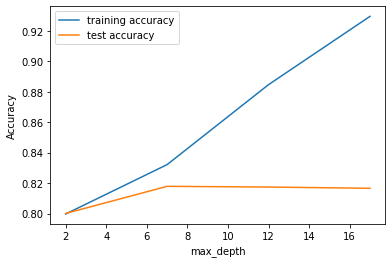

In [15]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


When the max_depth value is increased both train and test score increase till a point and after that the test score decreases. Hence overfitting occures when we increase max_depth. Controlling the max_depth will help reducing the overfitting in the forest. 

<hr>

### Tuning n_estimators

In [16]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


n_folds = 5

parameters = {'n_estimators': range(100, 1500, 400)}

rf = RandomForestClassifier(max_depth=4) # to avoid overfitting in the forest

rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [17]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.244566,0.167220,0.061488,0.006536,100,{'n_estimators': 100},0.811190,0.813333,0.808333,0.805238,...,0.808762,0.003120,4,0.810298,0.810714,0.809107,0.813155,0.811310,0.810917,0.001331
1,10.983400,0.728320,0.329978,0.047862,500,{'n_estimators': 500},0.811667,0.815476,0.810476,0.805714,...,0.810048,0.003491,1,0.811131,0.810714,0.811488,0.813155,0.813155,0.811929,0.001031
2,20.004879,1.670566,0.532905,0.014847,900,{'n_estimators': 900},0.811429,0.813810,0.811429,0.805714,...,0.810000,0.002920,2,0.811250,0.810179,0.811548,0.812976,0.812917,0.811774,0.001060
3,26.460982,0.240684,0.761612,0.034537,1300,{'n_estimators': 1300},0.811429,0.814048,0.810952,0.805476,...,0.809762,0.003133,3,0.811012,0.810179,0.811369,0.812679,0.812679,0.811583,0.000974


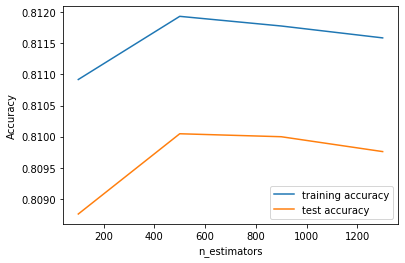

In [18]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<hr>

### Tuning max_features

In [22]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4) 


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [23]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.029573,0.049046,0.062573,0.000160,4,{'max_features': 4},0.810238,0.812381,0.812619,0.804524,...,0.809333,0.003160,5,0.810714,0.810000,0.812083,0.812321,0.813155,0.811655,0.001140
1,3.481143,0.081863,0.064709,0.004427,8,{'max_features': 8},0.816667,0.822619,0.820952,0.816429,...,0.819048,0.002414,1,0.821429,0.820893,0.821726,0.821607,0.821429,0.821417,0.000285
2,5.808707,0.262955,0.062497,0.009872,14,{'max_features': 14},0.816905,0.821190,0.818333,0.817381,...,0.818333,0.001506,3,0.821667,0.821071,0.821905,0.822083,0.821964,0.821738,0.000360
3,7.810171,0.098824,0.057487,0.008958,20,{'max_features': 20},0.818333,0.820952,0.819286,0.815476,...,0.818619,0.001791,2,0.822143,0.820952,0.821667,0.823333,0.822024,0.822024,0.000775
4,9.814038,0.670950,0.067293,0.008385,24,{'max_features': 24},0.817857,0.821190,0.818095,0.815952,...,0.818190,0.001688,4,0.822917,0.821488,0.822262,0.823155,0.822679,0.822500,0.000586


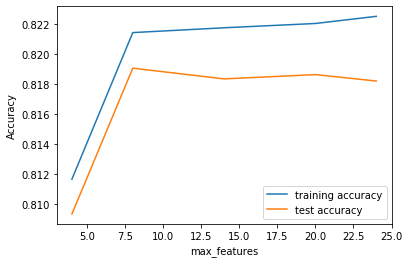

In [24]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


The training and test scores both seem to increase as increasing max_features, and the model doesn't seem to overfit more with increasing max_features.

### Tuning min_samples_leaf

In [25]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'min_samples_leaf': range(100, 400, 50)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    return_train_score=True
                 )
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [26]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.776843,0.080686,0.097684,0.004707,100,{'min_samples_leaf': 100},0.812381,0.819762,0.812381,0.812857,...,0.813190,0.003632,1,0.817202,0.816310,0.813571,0.819702,0.814821,0.816321,0.002099
1,3.515044,0.092177,0.093509,0.011790,150,{'min_samples_leaf': 150},0.812857,0.811190,0.810952,0.805476,...,0.809571,0.002716,3,0.813393,0.809524,0.810595,0.812619,0.810774,0.811381,0.001415
2,3.361477,0.083407,0.083662,0.006880,200,{'min_samples_leaf': 200},0.812381,0.815000,0.810714,0.803095,...,0.810000,0.004007,2,0.809286,0.813095,0.810714,0.809702,0.811667,0.810893,0.001377
3,2.941906,0.077234,0.081667,0.004855,250,{'min_samples_leaf': 250},0.810952,0.810476,0.808571,0.805238,...,0.808476,0.002117,4,0.809881,0.807619,0.809583,0.811667,0.809762,0.809702,0.001284
4,2.770444,0.048150,0.071867,0.007652,300,{'min_samples_leaf': 300},0.808810,0.809048,0.806190,0.805238,...,0.806810,0.001792,5,0.806607,0.806905,0.807619,0.810833,0.807798,0.807952,0.001506


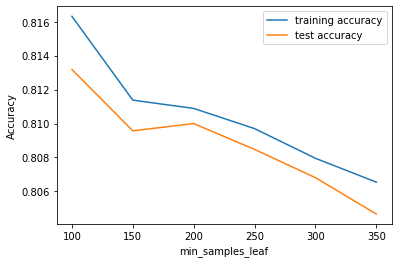

In [27]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model starts of overfit as you decrease the value of min_samples_leaf. 

### Tuning min_samples_split

In [28]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'min_samples_split': range(200, 500, 50)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="accuracy",
                    return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [29]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.175195,0.130739,0.101485,0.007731,200,{'min_samples_split': 200},0.818571,0.822381,0.821905,0.815952,...,0.819476,0.002383,1,0.823512,0.824048,0.823452,0.823988,0.824167,0.823833,0.000293
1,4.816691,0.126397,0.097192,0.006120,250,{'min_samples_split': 250},0.818095,0.821429,0.820714,0.816905,...,0.818952,0.001786,2,0.823452,0.822262,0.823274,0.823036,0.823869,0.823179,0.000533
2,4.572980,0.080907,0.094627,0.008554,300,{'min_samples_split': 300},0.816905,0.820714,0.820000,0.815476,...,0.817952,0.002035,5,0.821964,0.820833,0.821488,0.822560,0.821726,0.821714,0.000566
3,4.480813,0.102628,0.090619,0.006250,350,{'min_samples_split': 350},0.818810,0.820238,0.821667,0.815238,...,0.818619,0.002261,3,0.821548,0.819643,0.820179,0.821726,0.821310,0.820881,0.000821
4,4.369770,0.098246,0.087494,0.007654,400,{'min_samples_split': 400},0.816429,0.821905,0.819286,0.815238,...,0.818095,0.002328,4,0.820536,0.820417,0.819821,0.820952,0.820833,0.820512,0.000396


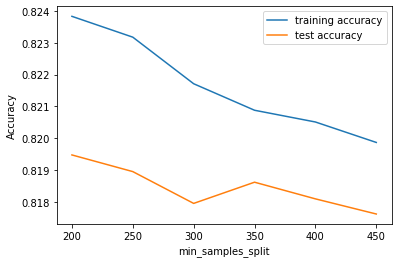

In [30]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<hr>

## Grid Search to Find Optimal Hyperparameters

In [31]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [32]:
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 11.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [33]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8182857142857142 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [34]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
predictions = rfc.predict(X_test)

In [37]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.36      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [39]:
print(confusion_matrix(y_test,predictions))

[[6754  304]
 [1252  690]]


In [40]:
(6754+690)/(6754+690+304+1252)

0.8272222222222222